In [16]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=2)

In [3]:
data = pd.read_csv('trends.csv', error_bad_lines=False)

# Предобработка данных

<b> Общие данные <b>

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.head()

,location,year,category,rank,query
0,Global,2001,Consumer Brands,1,Nokia
1,Global,2001,Consumer Brands,2,Sony
2,Global,2001,Consumer Brands,3,BMW
3,Global,2001,Consumer Brands,4,Palm
4,Global,2001,Consumer Brands,5,Adobe


In [6]:
data.shape

(26955, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26955 entries, 0 to 26954
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  26955 non-null  object
 1   year      26955 non-null  int64 
 2   category  26955 non-null  object
 3   rank      26955 non-null  int64 
 4   query     26955 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [8]:
data.describe()

,year,rank
count,26955.000000,26955.00000
mean,2015.243369,3.00000
std,3.564683,1.41424
min,2001.000000,1.00000
25%,2013.000000,2.00000
50%,2016.000000,3.00000
75%,2018.000000,4.00000
max,2020.000000,5.00000


In [9]:
data["year"].head()

0    2001
1    2001
2    2001
3    2001
4    2001
Name: year, dtype: int64

In [10]:
data.loc[0:4, ["rank", "query"]]

,rank,query
0,1,Nokia
1,2,Sony
2,3,BMW
3,4,Palm
4,5,Adobe


In [11]:
data.iloc[:, 2:4].head()

,category,rank
0,Consumer Brands,1
1,Consumer Brands,2
2,Consumer Brands,3
3,Consumer Brands,4
4,Consumer Brands,5


<b> Логика <b>

In [12]:
data[(data["query"] == "Ferrari") & (data["location"] == "Global")].head()

,location,year,category,rank,query
65,Global,2002,Consumer Brands,1,Ferrari
175,Global,2003,Consumer Brands,1,Ferrari
325,Global,2004,Car Images,1,Ferrari


In [13]:
data[(data["category"] == "Consumer Brands")].median()

year    2002.5
rank       3.0
dtype: float64

<b> Группировка по стране <b>

In [33]:

for locations, sub_df in data.groupby("location"):
    print(locations)
Kd=data.groupby("location")[["location","category", "query"]].head()
Kd

Argentina
Australia
Austria
Bangladesh
Belarus
Belgium
Brazil
Bulgaria
Canada
Chile
China
Colombia
Costa Rica
Croatia
Czechia
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Finland
France
Germany
Ghana
Global
Greece
Guatemala
Honduras
Hong Kong
Hungary
India
Indonesia
Ireland
Israel
Italy
Japan
Kazakhstan
Kenya
Kuwait
Latvia
Lithuania
Malaysia
Mexico
Myanmar (Burma)
Netherlands
New Zealand
Nigeria
Norway
Pakistan
Panama
Peru
Philippines
Poland
Portugal
Puerto Rico
Romania
Russia
Saudi Arabia
Senegal
Serbia
Singapore
Slovakia
Slovenia
South Africa
South Korea
Spain
Sri Lanka
Sudan
Sweden
Switzerland
Taiwan
Thailand
Turkey
Uganda
Ukraine
United Arab Emirates
United Kingdom
United States
Uruguay
Venezuela
Vietnam
Zimbabwe


,location,category,query
0,Global,Consumer Brands,Nokia
1,Global,Consumer Brands,Sony
2,Global,Consumer Brands,BMW
3,Global,Consumer Brands,Palm
4,Global,Consumer Brands,Adobe
125,France,Marques,SNCF
126,France,Marques,Wanadoo
127,France,Marques,Michelin
128,France,Marques,Air France
129,France,Marques,SFR


<b> Сводная таблица: Сколько трендов приведено для каждой страны в конкретный год<b>

In [15]:
pd.crosstab(data["year"], data["location"])

location,Argentina,Australia,Austria,Bangladesh,Belarus,Belgium,Brazil,Bulgaria,Canada,Chile,...,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,Vietnam,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,15,0,0,0,0,0
2003,0,15,0,0,0,0,0,0,15,0,...,0,0,0,0,15,0,0,0,0,0
2004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,15,0,0,0,0
2007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,55,0,0,0,0
2008,25,25,25,0,0,5,25,0,25,25,...,0,0,0,10,10,5,0,0,0,0
2009,5,5,5,0,0,25,5,0,20,10,...,0,0,0,20,5,40,0,0,0,0


# Визуализация

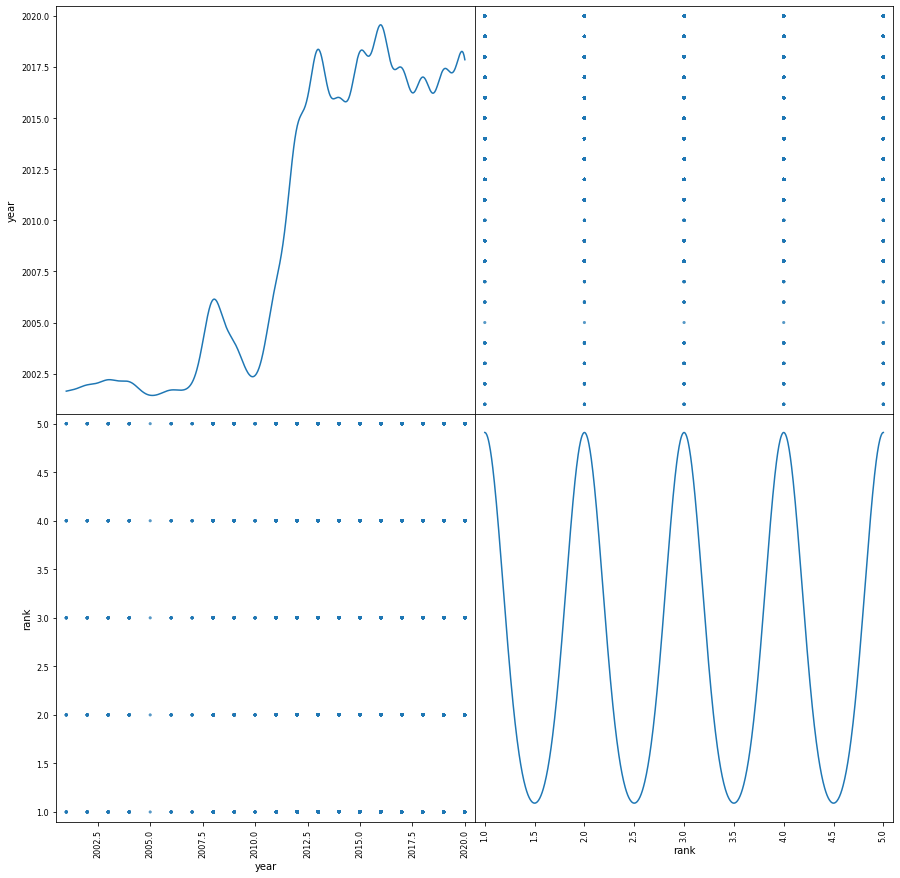

In [35]:
pd.plotting.scatter_matrix(
    data[["year", "rank"]], figsize=(15, 15), diagonal="kde"
)
plt.show()

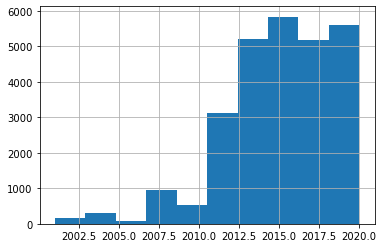

In [19]:
data["year"].hist()

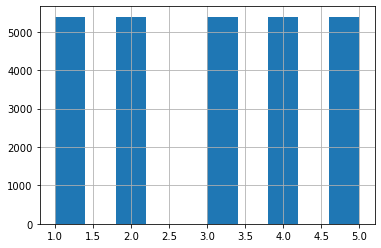

In [21]:
data["rank"].hist()

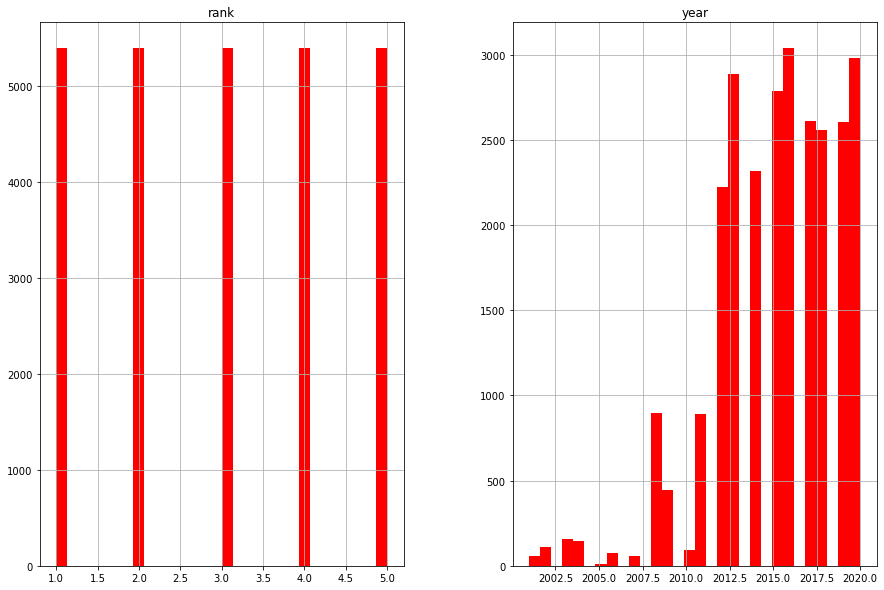

In [24]:
data.hist(color="r", bins=30, figsize=(15, 10))
plt.show()